# İleri Programlama 11. ders Tekrarı

In [2]:
## İleride kullanacağımız diğer veritabanları.
from astroquery.sdss import SDSS
from astroquery.skyview import SkyView

## Diğer astropy affiliated paketler.
from astropy import coordinates as coords
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata import Cutout2D
import astropy.units as u

## Çizim için kullanacağımız modül
import matplotlib.pyplot as plt
import numpy as np

# Bilinen bir objenin RA ve DEC değerlerini giriyoruz.
pos = coords.SkyCoord('13h10m27.46s +18d26m17.4s', frame='icrs')
# SDSS'den veriyi çekiyoruz (örneğin, 2 arcmin yarıçapında bir bölge)
xid = SDSS.query_region(pos, radius=2*u.arcmin, spectro=True)

xid

ra,dec,objid,run,rerun,camcol,field,z,plate,mjd,fiberID,specobjid,run2d
float64,float64,uint64,int64,int64,int64,int64,float64,int64,int64,int64,uint64,str7
197.641846269522,18.429861875168,1237668296598749825,5314,301,1,136,0.5469414,5863,56042,159,6601194960774780928,v5_13_2
197.633194033429,18.4504424841449,1237668296598749786,5314,301,1,136,0.5019647,5863,56042,899,6601398370425919488,v5_13_2
197.614455634642,18.438168849489,1237668296598749280,5314,301,1,136,0.0124487,2618,54506,310,2947691243863304192,26
197.597912043157,18.4190863442371,1237668296598683803,5314,301,1,135,0.08175173,2617,54502,50,2946493875633547264,26


In [3]:
sp = SDSS.get_spectra(matches=xid)
im = SDSS.get_images(matches=xid, band='r')

print (len(sp), len(im))

4 4


In [4]:
template = SDSS.get_spectral_template('qso')
print (len(template))

1


In [5]:
hdulist = im[0]
hdulist.info()

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [6]:
header = hdulist[0].header
print(header)
data = hdulist[0].data # görüntü ilk uzantıdadır
print(data.shape, data.dtype.name)

SIMPLE  =                    T /                                                BITPIX  =                  -32 / 32 bit floating point                          NAXIS   =                    2                                                  NAXIS1  =                 2048                                                  NAXIS2  =                 1489                                                  EXTEND  =                    T /Extensions may be present                       BZERO   =              0.00000 /Set by MRD_SCALE                                BSCALE  =              1.00000 /Set by MRD_SCALE                                TAI     =        4622429504.42 / 1st row - Number of seconds since Nov 17 1858  RA      =            197.17677 / 1st row - Right ascension of telescope boresighDEC     =            19.584618 / 1st row - Declination of telescope boresight (dSPA     =              94.137  / 1st row - Camera col position angle wrt north (IPA     =              31.487  / 1st row

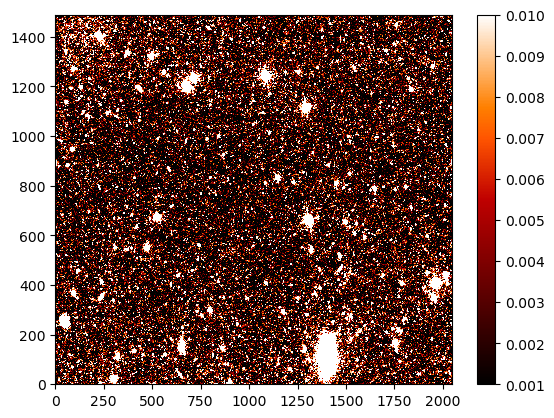

In [8]:
plt.imshow(data, origin='lower', cmap="gist_heat",
           vmax=0.01, vmin=0.001, # burada farklı değerler girebiliriz
           aspect="auto")
plt.colorbar();

In [9]:
data2 = hdulist[1].data
print(data2.shape, data2.dtype.name)

(2048,) float32


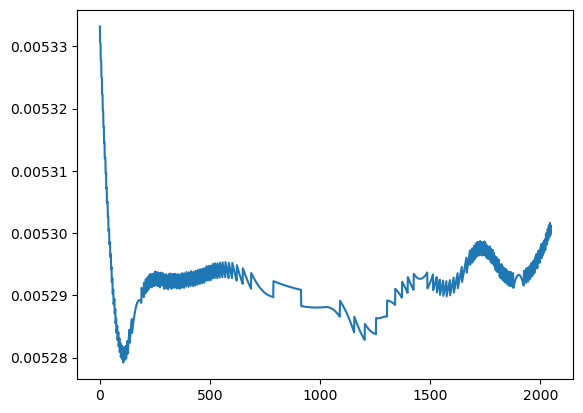

In [10]:
plt.plot(data2)

In [11]:
c0 = SkyCoord('13h10m27.46s','18d26m17.4s', frame="icrs")
wcs = WCS(header)
center = wcs.all_world2pix(c0.ra,c0.dec,0)
size = 400
cutout = Cutout2D(data, center, size, wcs=wcs)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


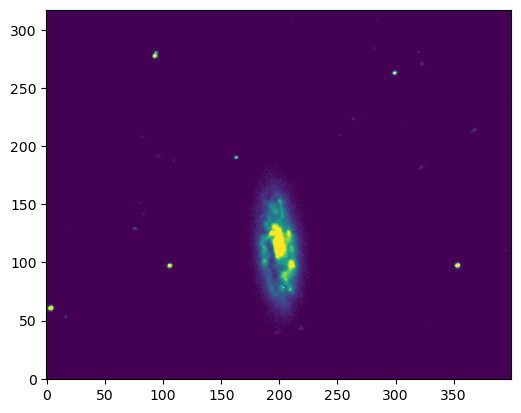

In [12]:
plt.imshow(cutout.data, vmin=0.1, vmax=2, origin="lower")

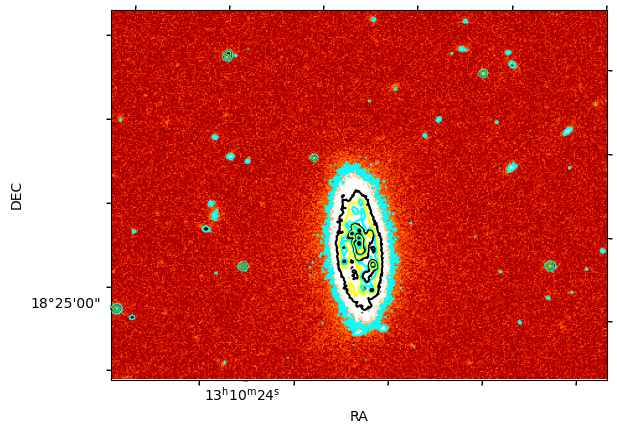

In [13]:
ax = plt.subplot(projection=cutout.wcs)

ra = ax.coords[0]
ra.set_major_formatter("hh:mm:ss")
dec = ax.coords[1]
dec.set_major_formatter("dd:mm:ss")

ax.set_xlabel("RA")
ax.set_ylabel("DEC")
ax.imshow(np.sqrt(cutout.data+1), cmap="gist_heat",
          origin="lower", vmax=1.1, vmin=0.9, aspect = "auto")

a = np.sqrt(cutout.data+1.)
min_a = np.min(a)
max_a = np.max(a)
levels = np.arange(min_a, max_a, (max_a-min_a)/20.)
labels = [item.get_text() for item in
          ax.get_xticklabels()]
ax.contour(a, levels, colors=['yellow','cyan','black'])

In [37]:
survey = "WISE 12"
sv = SkyView()
paths = sv.get_images(position="M 82",
                      survey=["WISE 12","GALEX Near UV"])

In [38]:
paths

[[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f7cb32962d0>],

In [39]:
wcs1 = WCS(paths[0][0].header)
wcs2 = WCS(paths[1][0].header)

In [40]:
wcs2

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN' 'DEC--TAN' 
CRVAL : 148.968 69.6797 
CRPIX : 150.5 150.5 
PC1_1 PC1_2  : 1.0 0.0 
PC2_1 PC2_2  : 0.0 1.0 
CDELT : -0.00041666666 0.00041666666 
NAXIS : 300  300

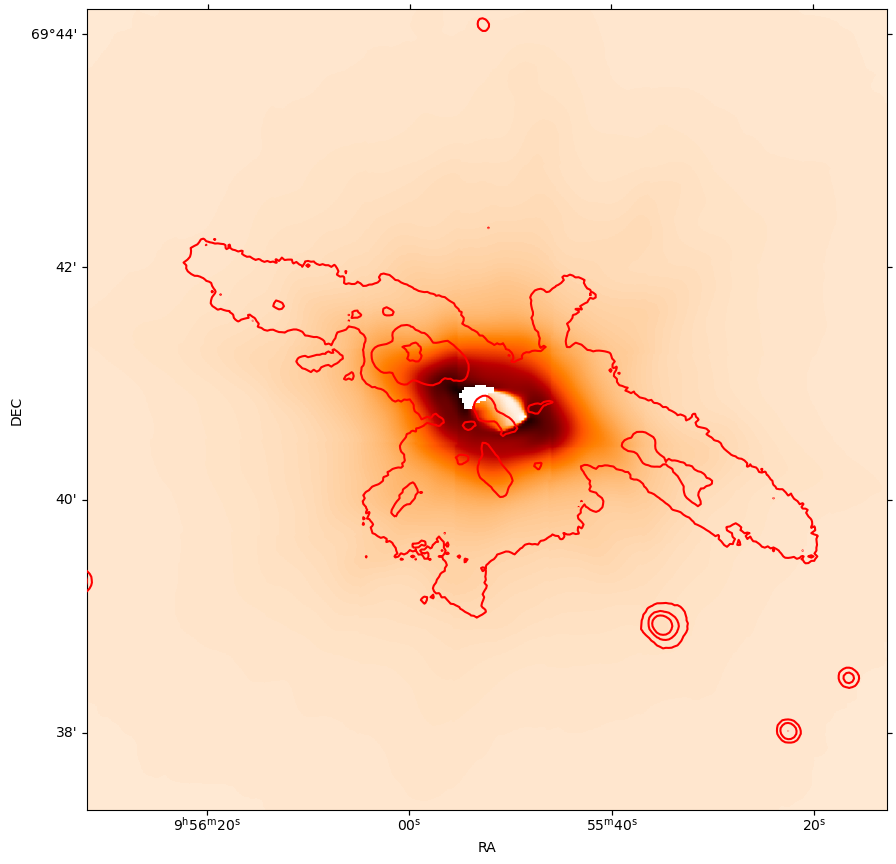

In [42]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=wcs1)
ax.imshow(paths[0][0].data, origin="lower",
          cmap="gist_heat_r")
ima2 = paths[1][0].data
#levels = np.arange(np.nanmin(ima2),np.nanmax(ima2), 1.)
levels = np.nanmin(ima2) + [0.02,0.09,0.5]
ax.contour(ima2, levels, transform=ax.get_transform(wcs2),colors="r")

plt.xlabel("RA")
plt.ylabel("DEC")
plt.show()

In [44]:
from astropy.io import fits
from astropy.table import Table
from astropy.utils.data import get_pkg_data_filename

In [45]:
event_filename = get_pkg_data_filename('tutorials/FITS-tables/chandra_events.fits')

In [46]:
ket = fits.open(event_filename)

In [47]:
ket[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
HDUNAME = 'PRIMARY '                                                            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
ORIGIN  = 'ASC     '           / Source of FITS file                            
CREATOR = 'cxc - Version DS 8.5' / tool that created this output                
CHECKSUM= 'ecnIhclGeclGeclG'   / HDU checksum updated 2012-12-26T17:20:09       
DATASUM = '        '        

In [48]:
fits.info(event_filename)

Filename: /home/ebupi/.astropy/cache/download/url/333246bccb141ea3b4e86c49e45bf8d6/contents
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      30   ()      
  1  EVENTS        1 BinTableHDU    890   483964R x 19C   [1D, 1I, 1I, 1J, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           3 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           2 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           1 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           0 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   


Uzantı 1, EVENTS, Chandra'nın HETG-S dedektörüne çarpan her bir X-ışını fotonu hakkında bilgi içeren bir Tablodur.

Tabloyu okumak için `~astropy.table.Table` kullanın.

In [49]:
events = Table.read(event_filename, hdu=1)

In [50]:
print(events.columns)

<TableColumns names=('time','ccd_id','node_id','expno','chipx','chipy','tdetx','tdety','detx','dety','x','y','pha','pha_ro','energy','pi','fltgrade','grade','status')>


In [57]:
print(events['energy'].unit)
print(events['time'].unit)
print(events['pi'].unit)

eV
s
chan


In [55]:
print(events['energy'])
print("**********")
print(events['time'])
print("**********")
print(events['pi'])

  energy 
    eV   
---------
13874.715
2621.1938
12119.018
3253.0364
14214.382
1952.7239
3267.5334
3817.0366
2252.7295
      ...
4819.8286
12536.866
2599.5652
15535.768
6653.0815
14362.482
14653.954
 6652.827
 9672.882
1875.9359
Length = 483964 rows
**********
       time       
        s         
------------------
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
 238623220.9093583
               ...
238672393.54971933
238672393.54971933
238672393.54971933
238672393.54971933
238672393.54971933
238672393.59075934
238672393.59075934
238672393.59075934
238672393.59075934
238672393.63179934
Length = 483964 rows
**********
 pi 
chan
----
 951
 180
 831
 223
 974
 134
 224
 262
 155
 ...
 331
 859
 179
1024
 456
 984
1004
 456
 663
 129
Length = 483964 rows
